# Import Libraries

In [1]:
%matplotlib notebook
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# import plotly.express as px
from mpl_toolkits import mplot3d
plt.style.use('seaborn-whitegrid')
from sklearn import preprocessing
from sklearn.model_selection import KFold
import seaborn as sns

# Data Preprocessing

In [2]:
# Merge two data files

climbing_statistics_data = pd.read_csv("climbing_statistics.csv")
climbing_statistics_data['Date'] = pd.to_datetime(climbing_statistics_data['Date']) # Date Conversion
climbing_statistics_data.head()

,Date,Route,Attempted,Succeeded,Success Percentage
0,2015-11-27,Disappointment Cleaver,2,0,0.0
1,2015-11-21,Disappointment Cleaver,3,0,0.0
2,2015-10-15,Disappointment Cleaver,2,0,0.0
3,2015-10-13,Little Tahoma,8,0,0.0
4,2015-10-09,Disappointment Cleaver,2,0,0.0


In [3]:
weather_data = pd.read_csv("Rainier_Weather.csv")
weather_data['Date'] = pd.to_datetime(weather_data['Date']) # Date Conversion
weather_data.head()

,Date,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-12-31,13.845000,19.062917,21.870833,21.977792,62.325833,84.915292
1,2015-12-30,13.822917,14.631208,18.493833,3.540542,121.505417,86.192833
2,2015-12-29,13.834583,6.614292,34.072917,0.000000,130.291667,85.100917
3,2015-12-28,13.710417,8.687042,70.557917,0.000000,164.683750,86.241250
4,2015-12-27,13.362500,14.140417,95.754167,0.000000,268.479167,31.090708


In [4]:
climbing_statistics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4077 entries, 0 to 4076
Data columns (total 5 columns):
Date                  4077 non-null datetime64[ns]
Route                 4077 non-null object
Attempted             4077 non-null int64
Succeeded             4077 non-null int64
Success Percentage    4077 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 159.3+ KB


In [5]:
climbing_statistics_data.Date.drop_duplicates().count()

391

In [6]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 464 entries, 0 to 463
Data columns (total 7 columns):
Date                     464 non-null datetime64[ns]
Battery Voltage AVG      464 non-null float64
Temperature AVG          464 non-null float64
Relative Humidity AVG    464 non-null float64
Wind Speed Daily AVG     464 non-null float64
Wind Direction AVG       464 non-null float64
Solare Radiation AVG     464 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 25.5 KB


In [7]:
weather_data.Date.drop_duplicates().count()

464

In [8]:
# Spliting the data according to routes

climbing_statistics_data_dc = climbing_statistics_data[climbing_statistics_data['Route'] == 'Disappointment Cleaver']
climbing_statistics_data_dc = climbing_statistics_data_dc.drop(columns=['Route'])
climbing_statistics_data_dc.head().info()
print('No of unique data points', climbing_statistics_data_dc.Date.drop_duplicates().count())
climbing_statistics_data_dc.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 5
Data columns (total 4 columns):
Date                  5 non-null datetime64[ns]
Attempted             5 non-null int64
Succeeded             5 non-null int64
Success Percentage    5 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 200.0 bytes
No of unique data points 330


,Date,Attempted,Succeeded,Success Percentage
0,2015-11-27,2,0,0.0
1,2015-11-21,3,0,0.0
2,2015-10-15,2,0,0.0
4,2015-10-09,2,0,0.0
5,2015-10-03,10,0,0.0


In [9]:
climbing_statistics_data_dc = climbing_statistics_data_dc.groupby(['Date'])['Attempted', 'Succeeded', 'Success Percentage'].agg({
  'Attempted' : 'sum' , 'Succeeded' : 'sum', 'Success Percentage' : 'mean'  
})
climbing_statistics_data_dc['Success Percentage'] = climbing_statistics_data_dc['Succeeded'] / climbing_statistics_data_dc['Attempted']
climbing_statistics_data_dc.info()
climbing_statistics_data_dc.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 330 entries, 2014-01-05 to 2015-11-27
Data columns (total 3 columns):
Attempted             330 non-null int64
Succeeded             330 non-null int64
Success Percentage    330 non-null float64
dtypes: float64(1), int64(2)
memory usage: 10.3 KB


,Attempted,Succeeded,Success Percentage
Date,,,
2014-01-05,2,0,0.0
2014-01-06,16,0,0.0
2014-02-10,16,0,0.0
2014-02-22,5,0,0.0
2014-02-28,2,0,0.0


In [10]:
climbing_statistics_data_ew = climbing_statistics_data[climbing_statistics_data['Route'] == 'Emmons-Winthrop']
climbing_statistics_data_ew = climbing_statistics_data_ew.drop(columns=['Route'])
climbing_statistics_data_ew.info()
print('No of unique data points', climbing_statistics_data_ew.Date.drop_duplicates().count())
climbing_statistics_data_ew.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 632 entries, 84 to 3953
Data columns (total 4 columns):
Date                  632 non-null datetime64[ns]
Attempted             632 non-null int64
Succeeded             632 non-null int64
Success Percentage    632 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 24.7 KB
No of unique data points 184


,Date,Attempted,Succeeded,Success Percentage
84,2015-09-05,5,0,0.0
132,2015-08-26,2,1,0.5
162,2015-08-22,4,0,0.0
176,2015-08-21,5,0,0.0
178,2015-08-21,4,4,1.0


In [11]:
climbing_statistics_data_ew = climbing_statistics_data_ew.groupby(['Date'])['Attempted', 'Succeeded', 'Success Percentage'].agg({
  'Attempted' : 'sum' , 'Succeeded' : 'sum', 'Success Percentage' : 'mean'  
})
climbing_statistics_data_ew['Success Percentage'] = climbing_statistics_data_ew['Succeeded'] / climbing_statistics_data_ew['Attempted']
climbing_statistics_data_ew.info()
climbing_statistics_data_ew.head(5)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 184 entries, 2014-05-14 to 2015-09-05
Data columns (total 3 columns):
Attempted             184 non-null int64
Succeeded             184 non-null int64
Success Percentage    184 non-null float64
dtypes: float64(1), int64(2)
memory usage: 5.8 KB


,Attempted,Succeeded,Success Percentage
Date,,,
2014-05-14,1,0,0.000000
2014-05-23,2,0,0.000000
2014-05-24,7,0,0.000000
2014-05-30,12,8,0.666667
2014-05-31,12,5,0.416667


In [12]:
# Merge weather and climbe stat data only with common entries of date

input_combined_data_dc = pd.merge(right = weather_data, left = climbing_statistics_data_dc, how = 'inner', on = 'Date')
input_combined_data_dc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 177
Data columns (total 10 columns):
Date                     178 non-null datetime64[ns]
Attempted                178 non-null int64
Succeeded                178 non-null int64
Success Percentage       178 non-null float64
Battery Voltage AVG      178 non-null float64
Temperature AVG          178 non-null float64
Relative Humidity AVG    178 non-null float64
Wind Speed Daily AVG     178 non-null float64
Wind Direction AVG       178 non-null float64
Solare Radiation AVG     178 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 15.3 KB


In [13]:
input_combined_data_ew = pd.merge(right = weather_data, left = climbing_statistics_data_ew, how = 'inner', on = 'Date')
input_combined_data_ew.info()
input_combined_data_ew.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 0 to 90
Data columns (total 10 columns):
Date                     91 non-null datetime64[ns]
Attempted                91 non-null int64
Succeeded                91 non-null int64
Success Percentage       91 non-null float64
Battery Voltage AVG      91 non-null float64
Temperature AVG          91 non-null float64
Relative Humidity AVG    91 non-null float64
Wind Speed Daily AVG     91 non-null float64
Wind Direction AVG       91 non-null float64
Solare Radiation AVG     91 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2)
memory usage: 7.8 KB


,Date,Attempted,Succeeded,Success Percentage,Battery Voltage AVG,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,2015-05-02,2,0,0.0,13.560417,30.664583,30.904833,6.065500,141.957083,44.960000
1,2015-05-07,3,0,0.0,13.668333,25.247083,19.201667,10.208875,150.935833,16.210417
2,2015-05-08,2,0,0.0,13.649167,28.242083,52.793750,6.912000,122.807417,35.502083
3,2015-05-09,6,0,0.0,13.550000,31.014167,72.705000,3.497208,212.657958,37.429458
4,2015-05-13,4,0,0.0,13.566250,25.059583,97.116667,4.398875,98.803833,0.000000


In [14]:
# Drop 

input_dc = input_combined_data_dc.drop(columns = ['Date', 'Attempted', 'Succeeded', 'Battery Voltage AVG'])
input_ew = input_combined_data_ew.drop(columns = ['Date', 'Attempted', 'Succeeded', 'Battery Voltage AVG'])

In [15]:
# Split data into X (features),Y (Labels)

dc_X_all = input_dc.drop(columns = ['Success Percentage'])
dc_Y_all = input_dc['Success Percentage']

ew_X_all = input_ew.drop(columns = ['Success Percentage'])
ew_Y_all = input_ew['Success Percentage']

In [16]:
# Scale data - min max scaler

min_max_scaler = preprocessing.MinMaxScaler()
dc_X_scaled = min_max_scaler.fit_transform(dc_X_all)
dc_X_scaled = pd.DataFrame(dc_X_scaled)
dc_X_scaled.columns = dc_X_all.columns
dc_X_all = dc_X_scaled
dc_X_all.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,0.505612,1.000000,0.999570,0.902171,0.045085
1,0.438670,1.000000,0.701431,0.991273,0.102902
2,0.377569,0.998336,0.037474,0.993334,0.387710
3,0.407589,1.000000,0.002239,0.922300,0.310824
4,0.515404,0.545856,0.099207,0.385190,0.618376


In [17]:
ew_X_scaled = min_max_scaler.fit_transform(ew_X_all)
ew_X_scaled = pd.DataFrame(ew_X_scaled)
ew_X_scaled.columns = ew_X_all.columns
ew_X_all = ew_X_scaled
ew_X_all.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Wind Direction AVG,Solare Radiation AVG
0,0.182428,0.216051,0.151143,0.475686,0.122155
1,0.008660,0.079043,0.269035,0.510140,0.044043
2,0.104726,0.472304,0.175229,0.402202,0.096458
3,0.193641,0.705404,0.078068,0.746989,0.101695
4,0.002646,0.991191,0.103723,0.310092,0.000000


In [18]:
# Split data in train, test 80 -20
dc_X, dc_X_test, dc_Y, dc_Y_test = train_test_split(dc_X_all, dc_Y_all, test_size=0.2, random_state=1)
ew_X, ew_X_test, ew_Y, ew_Y_test = train_test_split(ew_X_all, ew_Y_all, test_size=0.2, random_state=1)

# Visualize Data

<IPython.core.display.Javascript object>


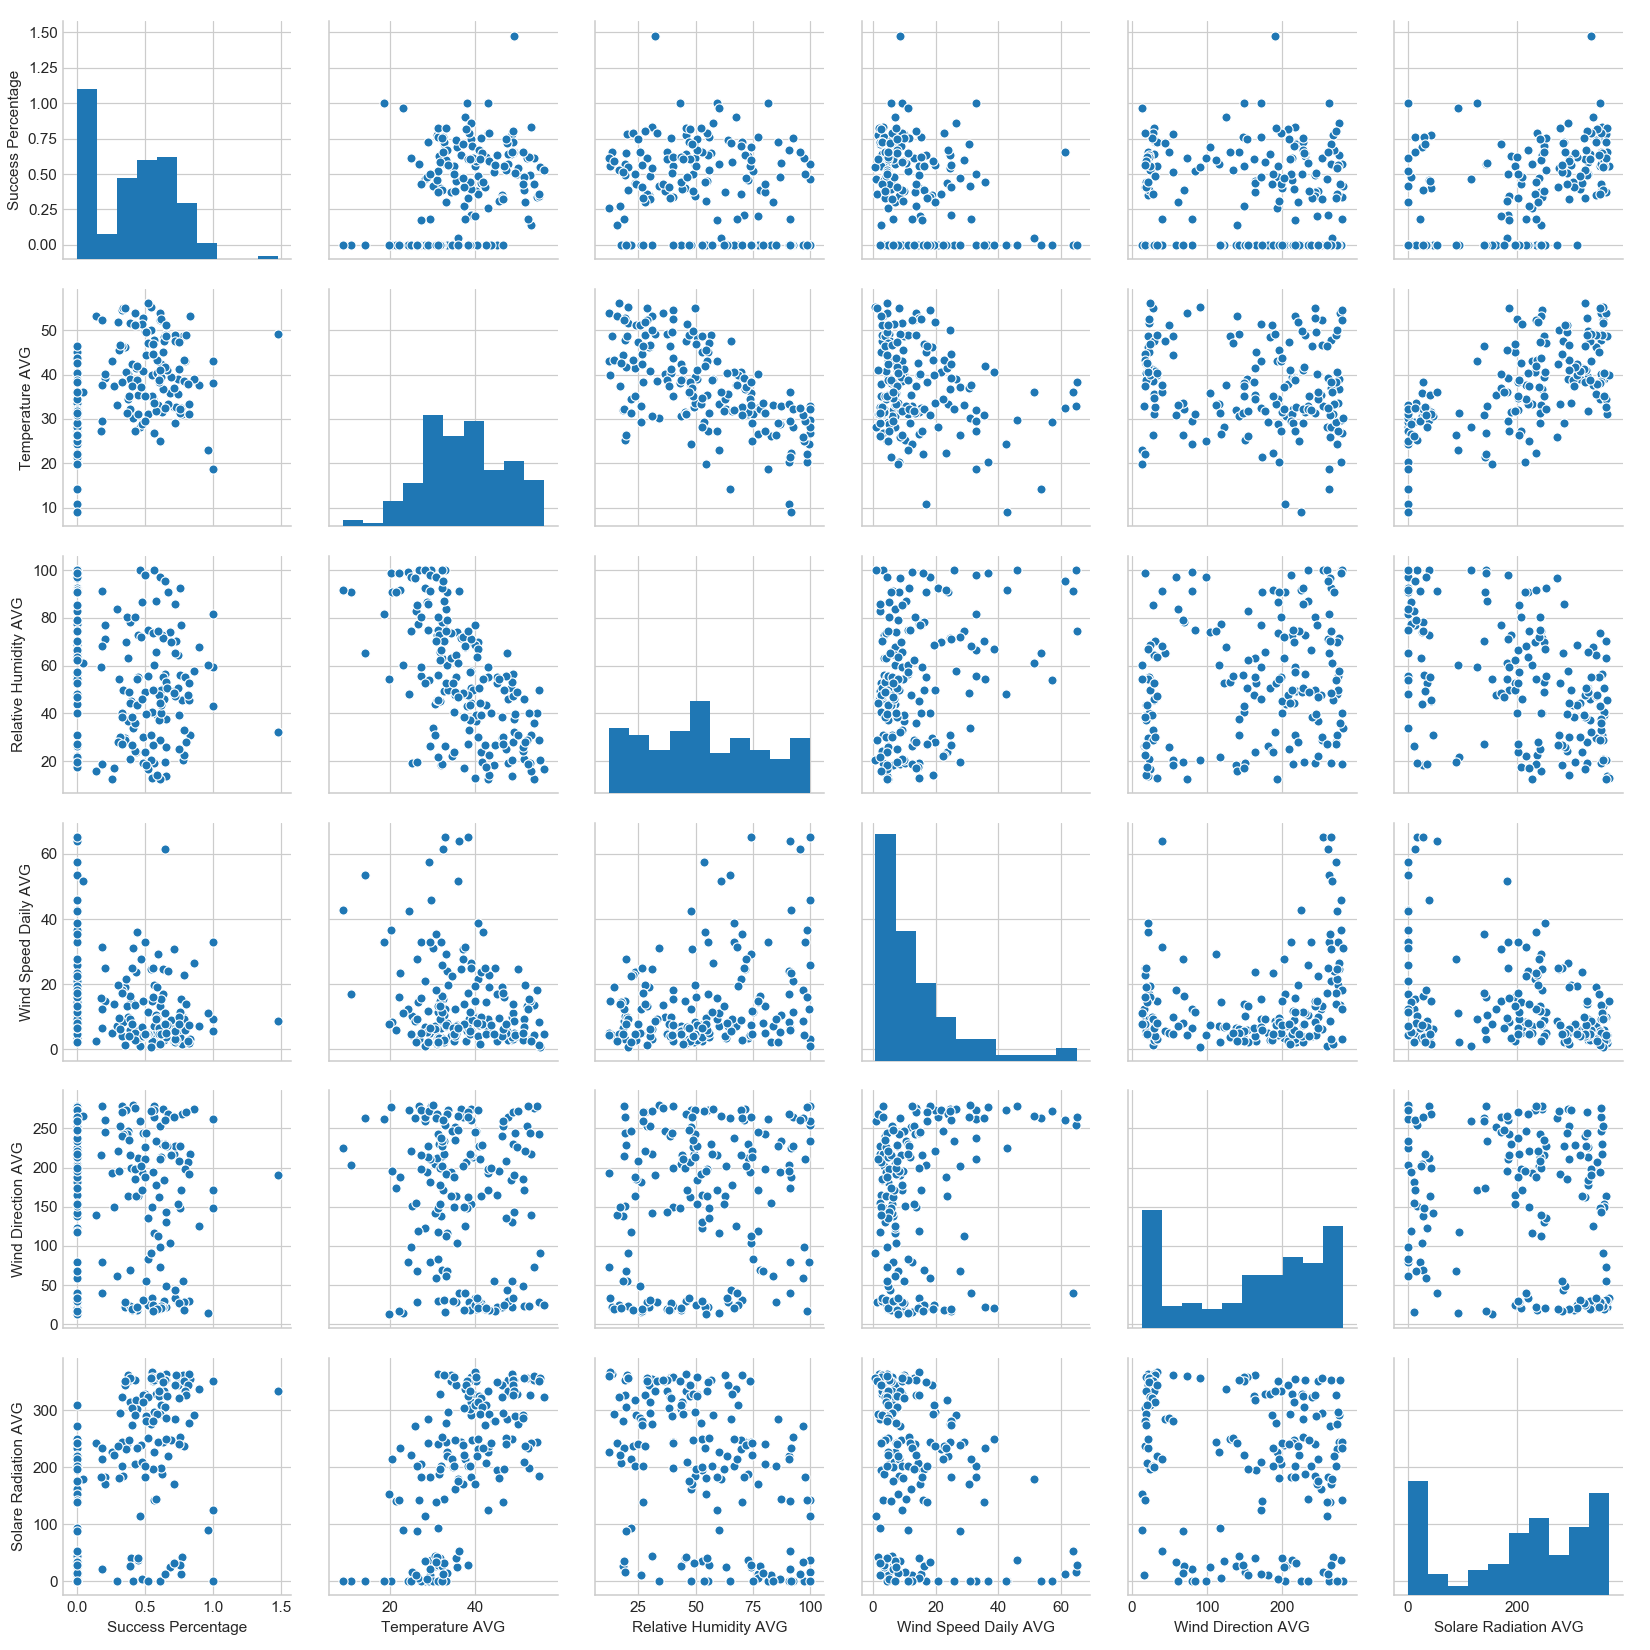

In [19]:
# Correlation plots
sns.pairplot(input_dc, diag_kind='hist')

<IPython.core.display.Javascript object>


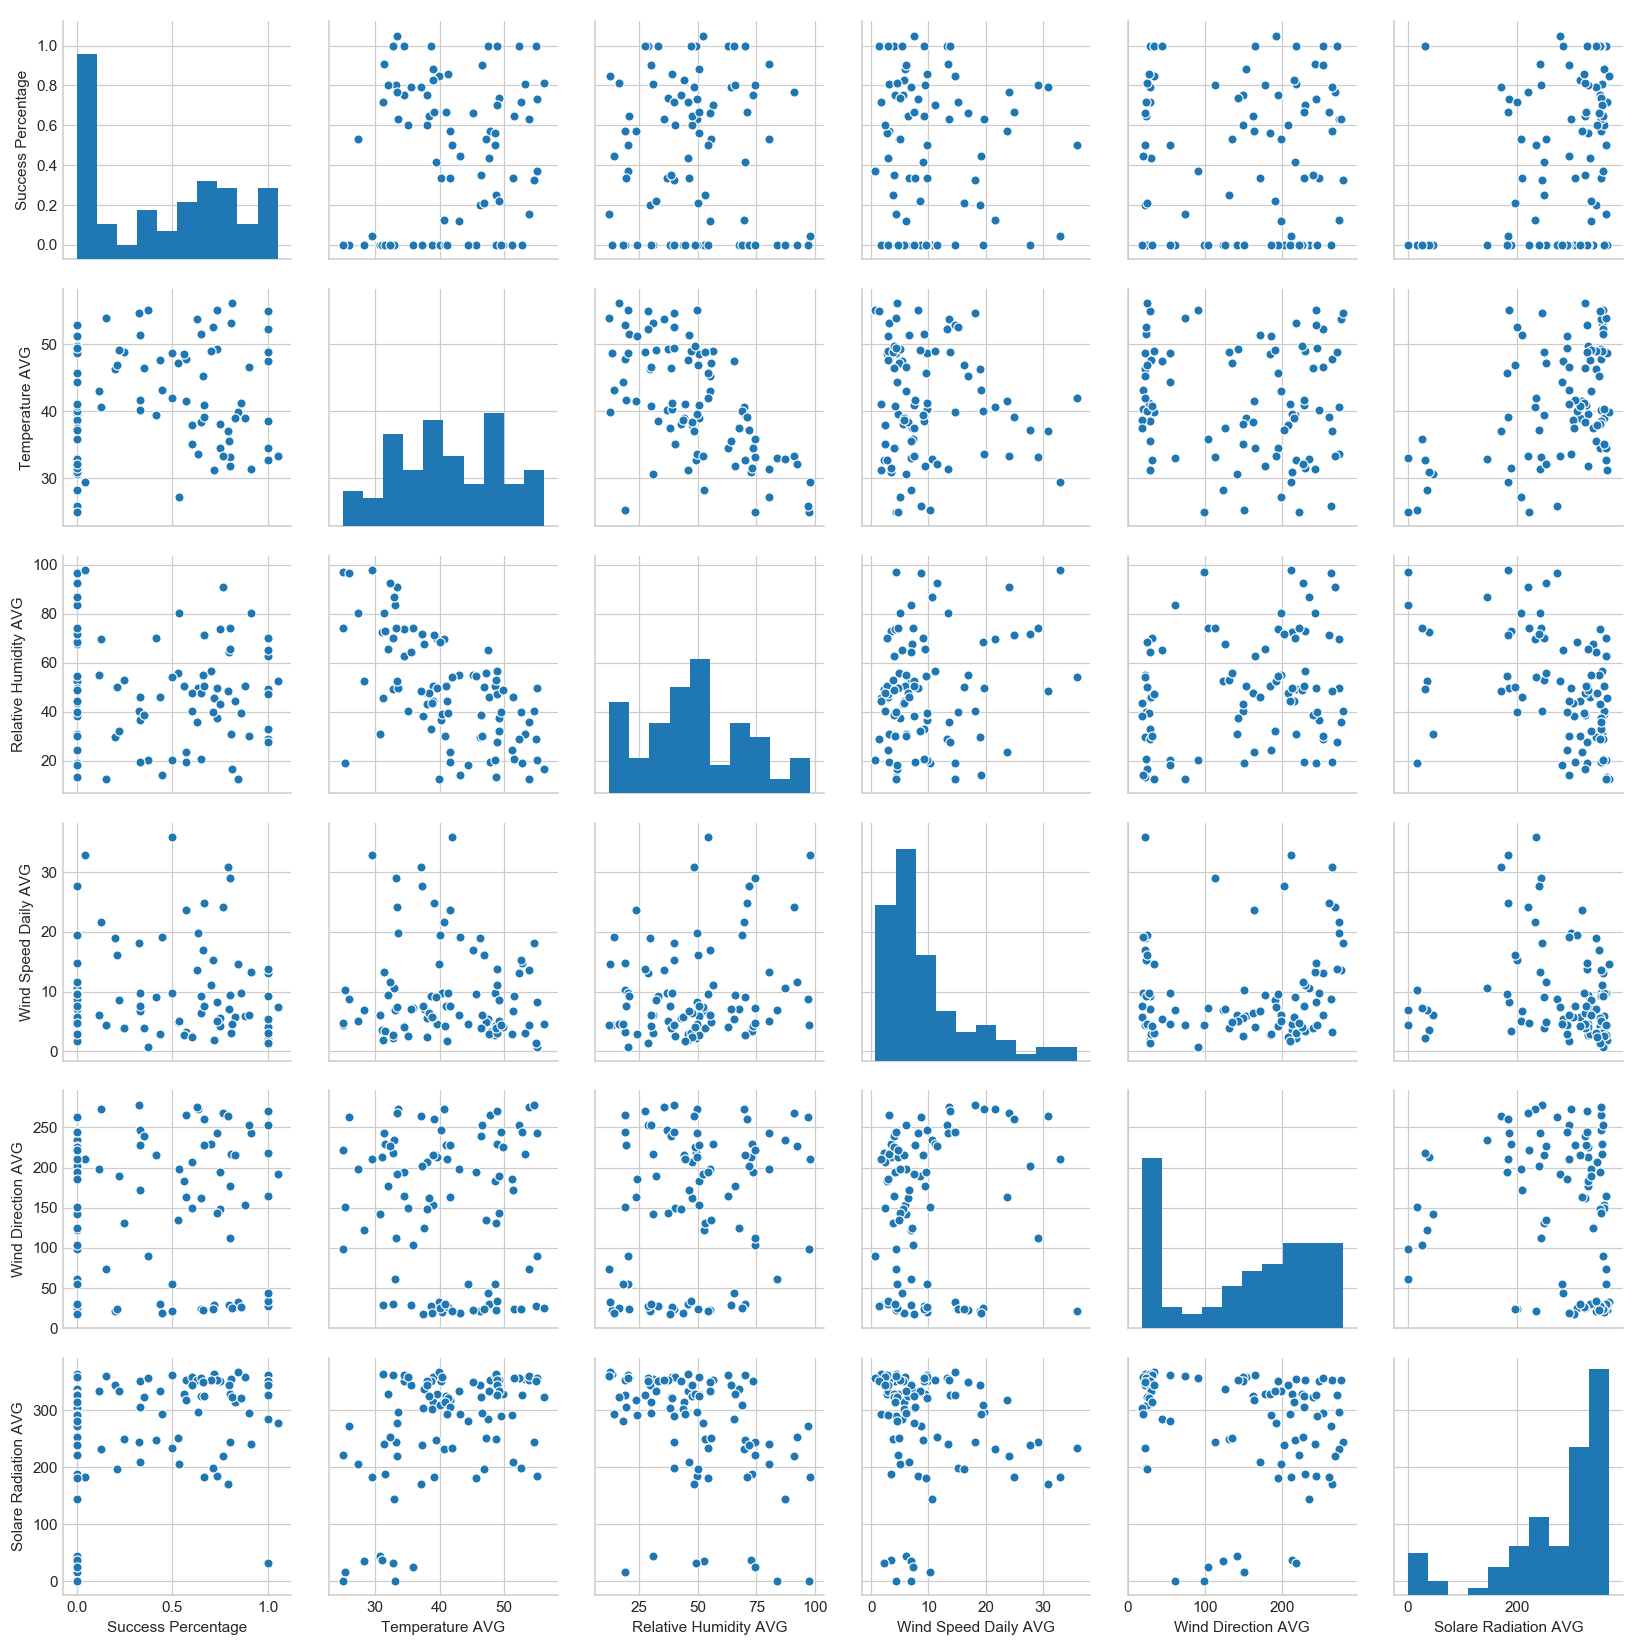

In [22]:
sns.pairplot(input_ew, diag_kind='hist')

In [20]:
# Correlation matrix of features
corr_matrix = input_dc.corr()
fig = go.Figure(data=go.Heatmap(
                    z=np.array(corr_matrix),
                      x=corr_matrix.columns,
                      y=corr_matrix.columns))
fig.show()

In [21]:
# Correlation matrix of features
corr_matrix = input_ew.corr()
fig = go.Figure(data=go.Heatmap(
                    z=np.array(corr_matrix),
                      x=corr_matrix.columns,
                      y=corr_matrix.columns))
fig.show()

# Linear Regression

## Route : Disappointment Cleaver

In [171]:
# Train

regressor = LinearRegression()
regressor.fit(dc_X,dc_Y)

# Linear regression coefficients
print('Linear Regression coefficients :',regressor.coef_)

# Predicted values
predicted_values = regressor.predict(dc_X)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - dc_Y)**2))
print('Linear Regression RMSE:',RMSE)

# Train RMSE: 0.2642616002232038

Linear Regression coefficients : [ 0.2877611   0.19462529 -0.25953572 -0.04179941  0.36772268]
Linear Regression RMSE: 0.2642616002232038


In [167]:
# Test

# Predicted values
predicted_values = regressor.predict(dc_X_test)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - dc_Y_test)**2))
print('Linear Regression RMSE:',RMSE)

# Test RMSE: 0.2721284518349259

Linear Regression RMSE: 0.2721284518349259


## Route : Emmons-Winthrop 

In [187]:
# Train

regressor = LinearRegression()
regressor.fit(ew_X,ew_Y)

# Linear regression coefficients
print('Linear Regression coefficients :',regressor.coef_)

# Predicted values
predicted_values = regressor.predict(ew_X)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - ew_Y)**2))
print('Linear Regression RMSE:',RMSE)

# Train RMSE: 0.33293770679864854

Linear Regression coefficients : [-0.08607633 -0.05958089  0.00330314 -0.00795646  0.59415787]
Linear Regression RMSE: 0.33293770679864854


In [26]:
# Test

# Predicted values
predicted_values = regressor.predict(ew_X_test)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - ew_Y_test)**2))
print('Linear Regression RMSE:',RMSE)

# Test RMSE: 0.39642938989883486

Linear Regression RMSE: 0.39642938989883486


# Polynomial Regression

## Route : Disappointment Cleaver

In [177]:
# Features for train
dc_X_poly = dc_X.copy()

# Drop Wind Direction
dc_X_poly = dc_X_poly.drop(columns = ['Wind Direction AVG'])

dc_X_poly['Temperature ^2'] = np.square(dc_X_poly['Temperature AVG'].values)
dc_X_poly['Humidity ^2'] = np.square(dc_X_poly['Relative Humidity AVG'].values)
dc_X_poly['Solar Radiation ^2'] = np.square(dc_X_poly['Solare Radiation AVG'].values)
dc_X_poly['Solar Radiation ^3'] = np.power(dc_X_poly['Solare Radiation AVG'].values,3)
dc_X_poly['Temp * Solar'] = np.multiply(dc_X_poly['Solare Radiation AVG'].values,dc_X_poly['Temperature AVG'].values)
dc_X_poly['Temp * Solar ^2'] = np.power(np.multiply(dc_X_poly['Solare Radiation AVG'].values,dc_X_poly['Temperature AVG'].values),2)
dc_X_poly['Wind Speed * Temp'] = np.multiply(dc_X_poly['Wind Speed Daily AVG'].values,dc_X_poly['Temperature AVG'].values)

dc_X_poly.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solare Radiation AVG,Temperature ^2,Humidity ^2,Solar Radiation ^2,Solar Radiation ^3,Temp * Solar,Temp * Solar ^2,Wind Speed * Temp
91,0.810031,0.494650,0.064281,0.685388,0.656150,0.244679,0.469757,0.321966,0.555186,0.308231,0.052069
81,0.837407,0.434977,0.031094,0.893235,0.701250,0.189205,0.797869,0.712685,0.748001,0.559506,0.026038
114,0.923337,0.315064,0.225292,0.540847,0.852551,0.099265,0.292516,0.158206,0.499384,0.249384,0.208020
48,0.605773,0.630296,0.097978,0.918312,0.366960,0.397273,0.843297,0.774410,0.556288,0.309457,0.059352
54,0.424036,0.839717,0.022783,0.773925,0.179806,0.705124,0.598960,0.463551,0.328172,0.107697,0.009661


In [178]:
# Correlation matrix of features
dc_all_data = dc_X_poly.copy()
dc_all_data['Success Percentage'] = dc_Y
corr_matrix = dc_all_data.corr()
fig = go.Figure(data=go.Heatmap(
                    z=np.array(corr_matrix),
                      x=corr_matrix.columns,
                      y=corr_matrix.columns))
fig.show()

In [179]:
# Train

regressor = LinearRegression()
regressor.fit(dc_X_poly,dc_Y)

# Linear regression coefficients
print('Linear Regression coefficients :',regressor.coef_)

# Predicted values
predicted_values = regressor.predict(dc_X_poly)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - dc_Y)**2))
print('Linear Regression RMSE:',RMSE)

# Train RMSE: 0.24916446916244425

Linear Regression coefficients : [ 0.81352452  0.52863681 -0.21270258 -1.06197813 -0.85586062 -0.29278585
 -0.03662759  0.70994228  2.20042568 -1.18993749 -0.08036667]
Linear Regression RMSE: 0.24916446916244425


In [30]:
# Features for test

dc_X_poly_test = dc_X_test.copy()

# Drop Wind Direction
dc_X_poly_test = dc_X_poly_test.drop(columns = ['Wind Direction AVG'])

dc_X_poly_test['Temperature ^2'] = np.square(dc_X_poly_test['Temperature AVG'].values)
dc_X_poly_test['Humidity ^2'] = np.square(dc_X_poly_test['Relative Humidity AVG'].values)
dc_X_poly_test['Solar Radiation ^2'] = np.square(dc_X_poly_test['Solare Radiation AVG'].values)
dc_X_poly_test['Solar Radiation ^3'] = np.power(dc_X_poly_test['Solare Radiation AVG'].values,3)
dc_X_poly_test['Temp * Solar'] = np.multiply(dc_X_poly_test['Solare Radiation AVG'].values,dc_X_poly_test['Temperature AVG'].values)
dc_X_poly_test['Temp * Solar ^2'] = np.power(np.multiply(dc_X_poly_test['Solare Radiation AVG'].values,dc_X_poly_test['Temperature AVG'].values),2)
dc_X_poly_test['Wind Speed * Temp'] = np.multiply(dc_X_poly_test['Wind Speed Daily AVG'].values,dc_X_poly_test['Temperature AVG'].values)

dc_X_poly_test.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solare Radiation AVG,Temperature ^2,Humidity ^2,Solar Radiation ^2,Solar Radiation ^3,Temp * Solar,Temp * Solar ^2,Wind Speed * Temp
161,0.666723,0.583930,0.111835,0.596266,0.444520,0.340974,0.355534,0.211993,0.397545,0.158042,0.074563
117,0.602864,0.297458,0.105728,0.827607,0.363444,0.088481,0.684933,0.566855,0.498934,0.248935,0.063740
19,0.491547,0.074349,0.122713,0.094236,0.241619,0.005528,0.008880,0.000837,0.046321,0.002146,0.060319
69,0.511460,0.706491,0.440623,0.663430,0.261591,0.499130,0.440139,0.292001,0.339318,0.115137,0.225361
53,0.358461,0.963295,0.123107,0.740004,0.128494,0.927938,0.547605,0.405230,0.265262,0.070364,0.044129


In [31]:
# Test

# Predicted values
predicted_values = regressor.predict(dc_X_poly_test)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - dc_Y_test)**2))
print('Linear Regression RMSE:',RMSE)

# Test RMSE: 0.24916483774226247

Linear Regression RMSE: 0.24916483774226247


## Route : Emmons-Winthrop

In [189]:
# Features for train

ew_X_poly = ew_X.copy()

# Drop Wind Direction
ew_X_poly = ew_X_poly.drop(columns = ['Wind Direction AVG'])

ew_X_poly['Temperature ^2'] = np.square(ew_X_poly['Temperature AVG'].values)
ew_X_poly['Solar Radiation ^2'] = np.square(ew_X_poly['Solare Radiation AVG'].values)
ew_X_poly['Solar Radiation ^3'] = np.power(ew_X_poly['Solare Radiation AVG'].values,3)
ew_X_poly['Temp * Solar'] = np.multiply(ew_X_poly['Solare Radiation AVG'].values,ew_X_poly['Temperature AVG'].values)
ew_X_poly['Temp * Solar ^2'] = np.power(np.multiply(ew_X_poly['Solare Radiation AVG'].values,ew_X_poly['Temperature AVG'].values),2)
ew_X_poly['Wind Speed * Temp'] = np.multiply(ew_X_poly['Wind Speed Daily AVG'].values,ew_X_poly['Temperature AVG'].values)

ew_X_poly.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solare Radiation AVG,Temperature ^2,Solar Radiation ^2,Solar Radiation ^3,Temp * Solar,Temp * Solar ^2,Wind Speed * Temp
84,0.692064,0.208429,0.150310,0.802009,0.478953,0.643218,0.515867,0.555042,0.308071,0.104024
53,0.232305,0.936139,0.307286,0.685973,0.053966,0.470559,0.322791,0.159355,0.025394,0.071384
19,0.758634,0.091711,0.255335,0.984725,0.575525,0.969683,0.954871,0.747045,0.558077,0.193705
85,0.785630,0.321796,0.101301,0.789451,0.617215,0.623233,0.492012,0.620217,0.384669,0.079585
36,0.923033,0.274310,0.365953,0.961803,0.851989,0.925064,0.889729,0.887775,0.788145,0.337786


In [190]:
# Correlation matrix of features
ew_all_data = ew_X_poly.copy()
ew_all_data['Success Percentage'] = ew_Y
corr_matrix = ew_all_data.corr()

fig = go.Figure(data=go.Heatmap(
                    z=np.array(corr_matrix),
                      x=corr_matrix.columns,
                      y=corr_matrix.columns))
fig.show()

In [191]:
# Train 

regressor = LinearRegression()
regressor.fit(ew_X_poly,ew_Y)

# Linear regression coefficients
print('Linear Regression coefficients :',regressor.coef_)

# Predicted values
predicted_values = regressor.predict(ew_X_poly)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - ew_Y)**2))
print('Linear Regression RMSE:',RMSE)

# Train RMSE: 0.3196377006361962

Linear Regression coefficients : [ 0.76779233 -0.05316987  0.18629983  1.00815055  0.62442471 -1.56547272
  1.81237143 -2.26111188  0.3881873  -0.09490658]
Linear Regression RMSE: 0.3196377006361962


In [46]:
# Features for test

ew_X_poly_test = ew_X_test.copy()

# Drop Wind Direction
ew_X_poly_test = ew_X_poly_test.drop(columns = ['Wind Direction AVG'])

ew_X_poly_test['Temperature ^2'] = np.square(ew_X_poly_test['Temperature AVG'].values)
# ew_X_poly_test['Humidity ^2'] = np.square(ew_X_poly_test['Relative Humidity AVG'].values)
ew_X_poly_test['Solar Radiation ^2'] = np.square(ew_X_poly_test['Solare Radiation AVG'].values)
ew_X_poly_test['Solar Radiation ^3'] = np.power(ew_X_poly_test['Solare Radiation AVG'].values,3)
ew_X_poly_test['Temp * Solar'] = np.multiply(ew_X_poly_test['Solare Radiation AVG'].values,ew_X_poly_test['Temperature AVG'].values)
ew_X_poly_test['Temp * Solar ^2'] = np.power(np.multiply(ew_X_poly_test['Solare Radiation AVG'].values,ew_X_poly_test['Temperature AVG'].values),2)
ew_X_poly_test['Wind Speed * Temp'] = np.multiply(ew_X_poly_test['Wind Speed Daily AVG'].values,ew_X_poly_test['Temperature AVG'].values)

ew_X_poly.head()

,Temperature AVG,Relative Humidity AVG,Wind Speed Daily AVG,Solare Radiation AVG,Temperature ^2,Solar Radiation ^2,Solar Radiation ^3,Temp * Solar,Temp * Solar ^2,Wind Speed * Temp
84,0.692064,0.208429,0.150310,0.802009,0.478953,0.643218,0.515867,0.555042,0.308071,0.104024
53,0.232305,0.936139,0.307286,0.685973,0.053966,0.470559,0.322791,0.159355,0.025394,0.071384
19,0.758634,0.091711,0.255335,0.984725,0.575525,0.969683,0.954871,0.747045,0.558077,0.193705
85,0.785630,0.321796,0.101301,0.789451,0.617215,0.623233,0.492012,0.620217,0.384669,0.079585
36,0.923033,0.274310,0.365953,0.961803,0.851989,0.925064,0.889729,0.887775,0.788145,0.337786


In [47]:
# Test

# Predicted values
predicted_values = regressor.predict(ew_X_poly_test)

# Root Mean Square Error
RMSE = np.sqrt(np.mean((predicted_values - ew_Y_test)**2))
print('Linear Regression RMSE:',RMSE)

# Test RMSE: 0.3714608104127144

Linear Regression RMSE: 0.3714608104127144


# Multilayer Perceptron - Model Selection

## Route : Disappointment Cleaver, Features : Linear

<IPython.core.display.Javascript object>


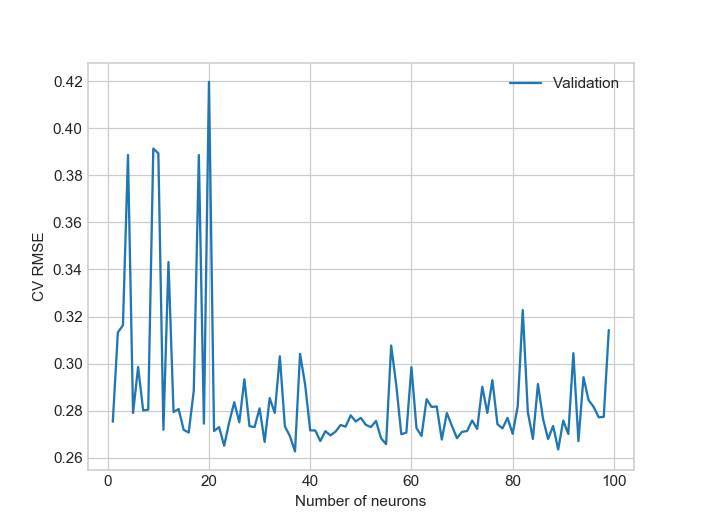

opt num_neurons : 36
Min RMSE : 0.262676647152206


In [181]:
# Peforming k-fold cross validation to select the model

cv_rmse = []

for i in range(1,100):
    
    kf = KFold(5, True, None)
    kf_rmse = []
    for train_index, test_index in kf.split(dc_X):
        
        X_train, X_test = dc_X.iloc[train_index], dc_X.iloc[test_index]
        y_train, y_test = dc_Y.iloc[train_index], dc_Y.iloc[test_index]

        # MLP 
        mlp = MLPRegressor(hidden_layer_sizes=(i),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.01,random_state=50)
        mlp.fit(X_train,y_train)

        predicted_values_mlp = mlp.predict(X_test)

        RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - y_test)**2))
        kf_rmse.append(RMSE_mlp)
    
    cv_rmse.append(np.mean(np.array(kf_rmse)))
    
fig1 = plt.figure()
plt.plot(range(1,100), cv_rmse, label='Validation')
plt.xlabel('Number of neurons')
plt.ylabel('CV RMSE')
plt.legend()

print('opt num_neurons :',cv_rmse.index(min(cv_rmse)))
print('Min RMSE :',min(cv_rmse))

# Optimal
#
# Number of neurons = 71
# RMSE = 0.26524028061097515

In [183]:
# MLP 
# Train

mlp = MLPRegressor(hidden_layer_sizes=(71),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.01,random_state=50)
mlp.fit(dc_X,dc_Y)

predicted_values_mlp = mlp.predict(dc_X)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - dc_Y)**2))
print("RMSE :",RMSE_mlp)

# RMSE : 0.25324279743786116

RMSE : 0.2592374729781553


In [93]:
# Test 

predicted_values_mlp = mlp.predict(dc_X_test)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - dc_Y_test)**2))
print("RMSE :",RMSE_mlp)

# RMSE: 

RMSE : 0.27112879953008007


## Route : Emmons-Winthrop, Features : Linear

<IPython.core.display.Javascript object>


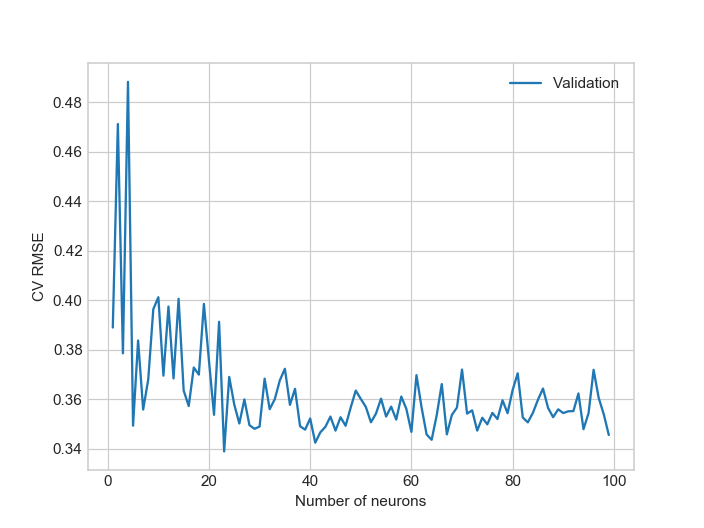

opt num_neurons : 22
Min RMSE : 0.3389247094972335


In [99]:
# Peforming k-fold cross validation to select the model

cv_rmse = []

for i in range(1,100):
    
    kf = KFold(5, True, 1)
    kf_rmse = []
    for train_index, test_index in kf.split(ew_X):
        
        X_train, X_test = ew_X.iloc[train_index], ew_X.iloc[test_index]
        y_train, y_test = ew_Y.iloc[train_index], ew_Y.iloc[test_index]

        # MLP 
        mlp = MLPRegressor(hidden_layer_sizes=(i),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.001,random_state=50)
        mlp.fit(X_train,y_train)

        predicted_values_mlp = mlp.predict(X_test)

        RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - y_test)**2))
        kf_rmse.append(RMSE_mlp)
    
    cv_rmse.append(np.mean(np.array(kf_rmse)))
    
fig1 = plt.figure()
plt.plot(range(1,100), cv_rmse, label='Validation')
plt.xlabel('Number of neurons')
plt.ylabel('CV RMSE')
plt.legend()

print('opt num_neurons :',cv_rmse.index(min(cv_rmse)))
print('Min RMSE :',min(cv_rmse))

# Optimal
#
# Number of neurons = 22
# RMSE = 0.3389247094972335

In [193]:
# MLP 
# Train

mlp = MLPRegressor(hidden_layer_sizes=(22),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.175,random_state=50)
mlp.fit(ew_X,ew_Y)

predicted_values_mlp = mlp.predict(ew_X)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - ew_Y)**2))
print("RMSE :",RMSE_mlp)

# RMSE :0.3330768907246581

RMSE : 0.3330768907246581


In [146]:
# Test

predicted_values_mlp = mlp.predict(ew_X_test)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - ew_Y_test)**2))
print("RMSE :",RMSE_mlp)

# RMSE :0.39660781181795246

RMSE : 0.39660781181795246


## Route : Disappointment Cleaver, Features : Polynomial

<IPython.core.display.Javascript object>


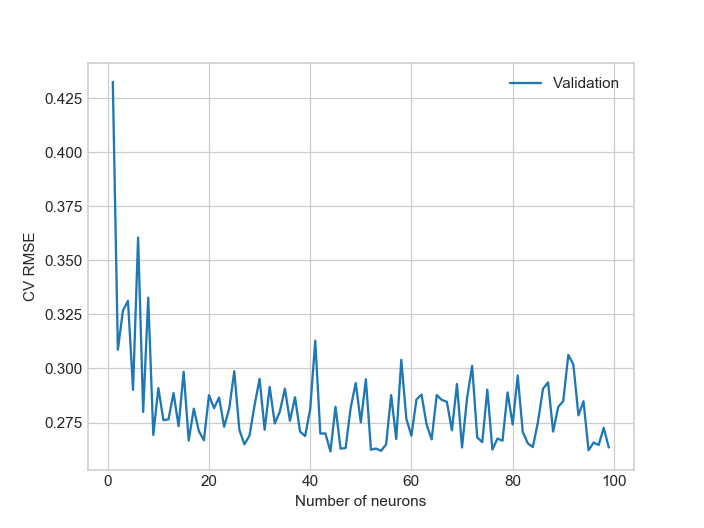

opt num_neurons : 43
Min RMSE : 0.2616522523275326


In [104]:
# Peforming k-fold cross validation to select the model

cv_rmse = []

for i in range(1,100):
    
    kf = KFold(5, True, None)
    kf_rmse = []
    for train_index, test_index in kf.split(dc_X_poly):
        
        X_train, X_test = dc_X_poly.iloc[train_index], dc_X_poly.iloc[test_index]
        y_train, y_test = dc_Y.iloc[train_index], dc_Y.iloc[test_index]

        # MLP 
        mlp = MLPRegressor(hidden_layer_sizes=(i),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.001,random_state=50)
        mlp.fit(X_train,y_train)

        predicted_values_mlp = mlp.predict(X_test)

        RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - y_test)**2))
        kf_rmse.append(RMSE_mlp)
    
    cv_rmse.append(np.mean(np.array(kf_rmse)))
    
fig1 = plt.figure()
plt.plot(range(1,100), cv_rmse, label='Validation')
plt.xlabel('Number of neurons')
plt.ylabel('CV RMSE')
plt.legend()

print('opt num_neurons :',cv_rmse.index(min(cv_rmse)))
print('Min RMSE :',min(cv_rmse))

# Optimal
#
# Number of neurons = 43
# RMSE = 0.2616522523275326

In [195]:
# MLP 

mlp = MLPRegressor(hidden_layer_sizes=(43),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.01,random_state=50)
mlp.fit(dc_X_poly,dc_Y)

predicted_values_mlp = mlp.predict(dc_X_poly)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - dc_Y)**2))
print("RMSE :",RMSE_mlp)

# RMSE : 0.25166657974460854

RMSE : 0.25166657974460854


In [151]:
# Test

predicted_values_mlp = mlp.predict(dc_X_poly_test)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - dc_Y_test)**2))
print("RMSE :",RMSE_mlp)

# RMSE : 0.2495910554685483

RMSE : 0.2531104874965663


## Route : Emmons-Winthrop, Features : Polynomial

<IPython.core.display.Javascript object>


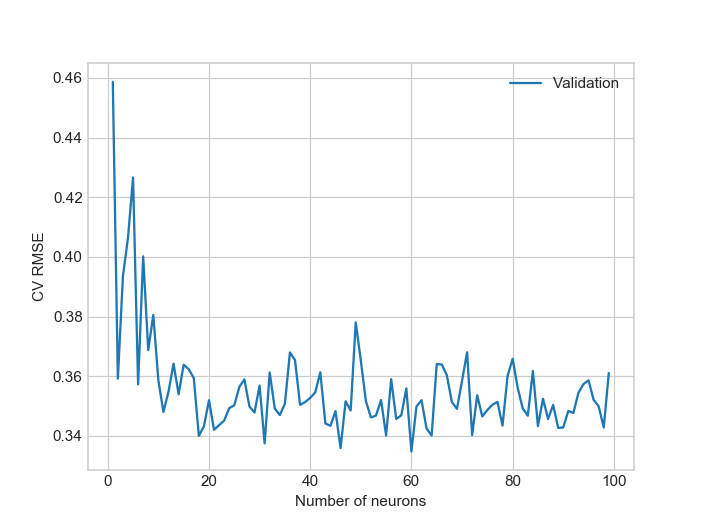

opt num_neurons : 59
Min RMSE : 0.33476402871646443


In [161]:
# Peforming k-fold cross validation to select the model

cv_rmse = []

for i in range(1,100):
    
    kf = KFold(5, True, 1)
    kf_rmse = []
    for train_index, test_index in kf.split(ew_X_poly):
        
        X_train, X_test = ew_X_poly.iloc[train_index], ew_X_poly.iloc[test_index]
        y_train, y_test = ew_Y.iloc[train_index], ew_Y.iloc[test_index]

        # MLP 
        mlp = MLPRegressor(hidden_layer_sizes=(i),max_iter=2500,activation='relu',learning_rate='constant',learning_rate_init=0.001,random_state=50)
        mlp.fit(X_train,y_train)

        predicted_values_mlp = mlp.predict(X_test)

        RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - y_test)**2))
        kf_rmse.append(RMSE_mlp)
    
    cv_rmse.append(np.mean(np.array(kf_rmse)))
    
fig1 = plt.figure()
plt.plot(range(1,100), cv_rmse, label='Validation')
plt.xlabel('Number of neurons')
plt.ylabel('CV RMSE')
plt.legend()

print('opt num_neurons :',cv_rmse.index(min(cv_rmse)))
print('Min RMSE :',min(cv_rmse))

# Optimal
#
# Number of neurons = 59
# RMSE = 0.33476402871646443

In [197]:
# MLP 

mlp = MLPRegressor(hidden_layer_sizes=(27),max_iter=1500,activation='relu',learning_rate='constant',learning_rate_init=0.0175,random_state=50)
mlp.fit(ew_X_poly,ew_Y)

predicted_values_mlp = mlp.predict(ew_X_poly)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - ew_Y)**2))
print("RMSE :",RMSE_mlp)

# RMSE : 0.3225564519173293

RMSE : 0.3225564519173293


In [165]:
# Test

predicted_values_mlp = mlp.predict(ew_X_poly_test)

RMSE_mlp = np.sqrt(np.mean((predicted_values_mlp - ew_Y_test)**2))
print("RMSE :",RMSE_mlp)

# RMSE : 0.3849606097944648

RMSE : 0.3849606097944648


In [169]:
# Plots

# Function to plot 3D scatter
def plot_comp_data(x,y,z,pred,xlabel,ylabel,zlabel):
    
    fig1 = plt.figure()
    fig_title = "Predicted vs Actual Happiness Score for " + xlabel + ", " + ylabel;
    fig1.suptitle(fig_title, fontsize=16)
    ax = plt.axes(projection='3d')
    ax.scatter(x,y,z,c='Green',marker='x',alpha=0.5, label='Actual')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.scatter(x,y,pred,c='Red',marker='<',alpha=0.5, label='Predicted')
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel)
    ax.legend()
    
    
    fig2 = plt.figure(figsize=plt.figaspect(0.5))

    ax1 = fig2.add_subplot(2, 1, 1, projection='3d')
    ax1.set_title('Actual')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_zlabel(zlabel)
    ax1.scatter(x, y, z,c='Green',marker='x',alpha=0.9, label='Actual')
    ax1.legend()

    ax2 = fig2.add_subplot(2, 1, 2, projection='3d')
    ax2.set_title('Predicted')
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    ax2.set_zlabel(zlabel)
    ax2.scatter(x, y, pred,c='Red',marker='x',alpha=0.9, label='Predicted')
    plt.tight_layout()
    ax2.legend()
    
    plt.show()

<IPython.core.display.Javascript object>


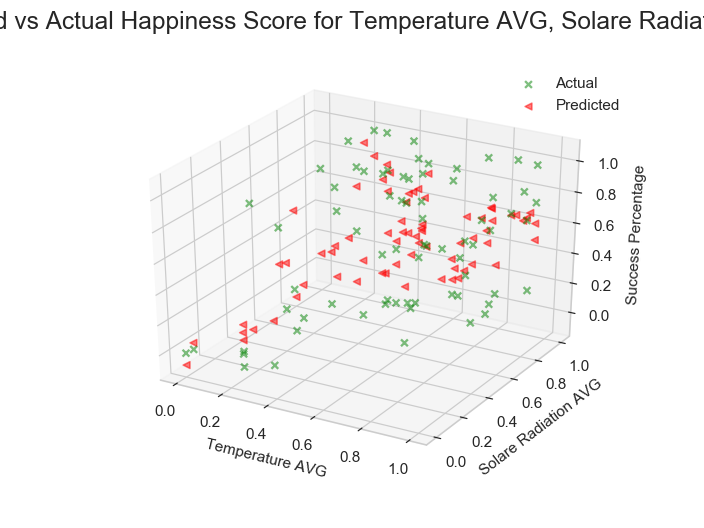

<IPython.core.display.Javascript object>


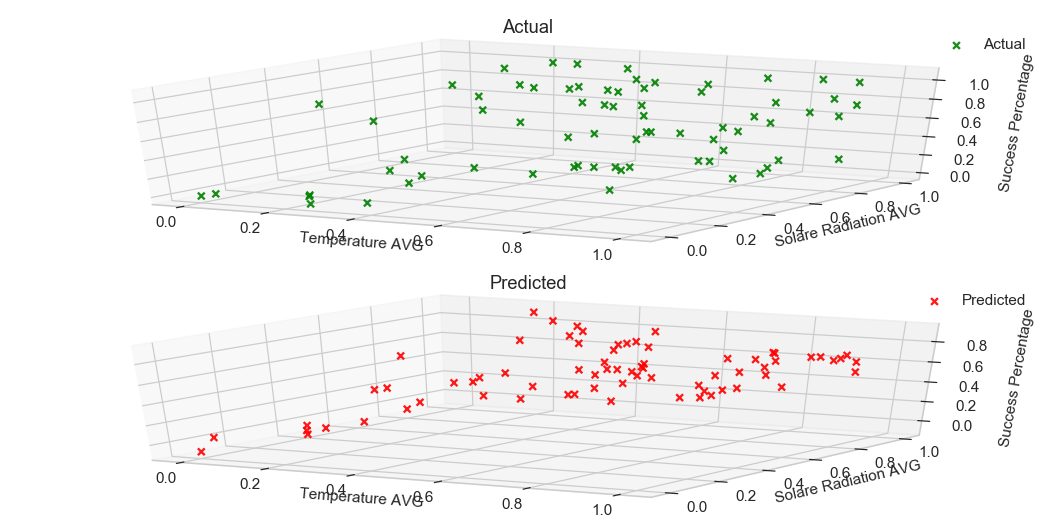

In [198]:
plot_comp_data(ew_X['Temperature AVG'],ew_X['Solare Radiation AVG'],ew_Y,predicted_values,'Temperature AVG','Solare Radiation AVG','Success Percentage')